In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from matplotlib import style
%matplotlib inline

# Module_01

## EDA ---- transactions table

### read the table

In [69]:
trans = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=1, skiprows=1)
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0
1,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0
2,17469,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,33879.0
3,2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,41245.0
4,6309,69,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.680000,33879.0


In [70]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### convert float to datetime

In [71]:
# trans['product_first_sold_date'].head()
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'], unit='s')
trans['product_first_sold_date'].head()

0   1970-01-01 11:43:38
1   1970-01-01 09:54:27
2   1970-01-01 09:24:39
3   1970-01-01 11:27:25
4   1970-01-01 09:24:39
Name: product_first_sold_date, dtype: datetime64[ns]

### check missing values

In [72]:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

__drop or refill missing values according to the objectives of the task__

### check duplicates

In [73]:
dups = trans.duplicated().any()
dups

False

__no duplicates__

### check columns

In [74]:
trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [75]:
trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [76]:
cat_col = ['transaction_date','order_status','brand', 'product_line','product_class','product_size', 
           'product_first_sold_date']

for col in cat_col:
    print (f'----- {col}----')
    print (trans[col].value_counts())

----- transaction_date----
2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-01-12    38
2017-12-07    37
2017-03-29    36
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64
----- order_status----
Approved     19821
Cancelled      179
Name: order_status, dtype: int64
----- brand----
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64
----- product_line----
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64
----- product_class----
medium    13826
high       3013
low        2964
Name: product_class, dtype: int64
----- product_size----
medium    12990
large      3976
small      2837
Name: product_size, dtype: int64
----- product_first_sold_date----
1970-01-01 09:24:39    234
1970-01-01 11:24:24    229
1970-01-01 10:30:23    227
1970-01-0

## EDA ---- NewCustomerList table

### read the table

In [372]:
ncList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=2, skiprows=1)

In [373]:
ncList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.63,0.7875,0.984375,0.836719,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.03,1.0300,1.287500,1.094375,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.02,1.0200,1.020000,1.020000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.45,0.5625,0.562500,0.562500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.58,0.5800,0.725000,0.725000,4,4,1.703125


In [374]:
ncList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

### drop unnamed columns

In [375]:
cols = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20']
ncList = ncList.drop(cols, axis=1)

### check missing values

In [376]:
ncList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

__drop or refill missing values according to the objectives of the task__

### check duplicates

In [377]:
dups = ncList.duplicated().any()
dups

False

__no duplicates__

### check columns

In [378]:
ncList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [379]:
ncList.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [380]:
cat_col = ['gender', 'job_title','job_industry_category', 'wealth_segment', 'deceased_indicator','owns_car',
           'state', 'country']

for col in cat_col:
    print (f'----- {col}----')
    print (ncList[col].value_counts())

----- gender----
Female    513
Male      470
U          17
Name: gender, dtype: int64
----- job_title----
Associate Professor            15
Software Consultant            14
Environmental Tech             14
Chief Design Engineer          13
Cost Accountant                12
                               ..
Statistician III                1
Health Coach I                  1
Accountant I                    1
Safety Technician I             1
Budget/Accounting Analyst I     1
Name: job_title, Length: 184, dtype: int64
----- job_industry_category----
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64
----- wealth_segment----
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64
----- deceased_indicator----
N    

In [381]:
ncList['gender'].replace('U','Unspecified', inplace=True)
ncList['gender'].value_counts()

Female         513
Male           470
Unspecified     17
Name: gender, dtype: int64

In [382]:
ncList['DOB'].describe()

count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

## EDA --- CustomerDemographic table

### read the table

In [88]:
cDemo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=3, skiprows=1)

In [89]:
cDemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [90]:
cDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

### check missing values

In [91]:
cDemo.isnull().sum(axis = 0)

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

__drop or refill missing values according to the objectives of the task__

### drop 'default' column

In [92]:
cDemo['default'].head(10)

0                                                   "'
1                         <script>alert('hi')</script>
2                                  2018-02-01 00:00:00
3    () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                  NIL
5                                             ðµ ð ð ð
6                                            â°â´âµâââ
7                              (â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)
8                                                  0/0
9                                                 ð©ð½
Name: default, dtype: object

In [93]:
cDemo.drop(columns='default',axis =1, inplace=True)

### check duplicates

In [94]:
dups = ncList.duplicated().any()
dups

False

__no duplicates__

### check columns

In [95]:
cDemo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [96]:
cDemo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [97]:
cat_col = ['gender','job_title','job_industry_category', 'wealth_segment', 'deceased_indicator','owns_car']
for col in cat_col:
    print (f'----- {col}----')
    print (cDemo[col].value_counts())

----- gender----
Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64
----- job_title----
Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Staff Accountant I                       4
Research Assistant III                   3
Health Coach III                         3
Health Coach I                           3
Developer I                              1
Name: job_title, Length: 195, dtype: int64
----- job_industry_category----
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64
----- wealth_segment--

In [98]:
cDemo['gender'].replace('U','Unspecified', inplace=True)
cDemo['gender'].replace('F','Female', inplace=True)
cDemo['gender'].replace('Femal','Female', inplace=True)
cDemo['gender'].replace('M','Male', inplace=True)

In [99]:
cDemo['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [100]:
cDemo['DOB'].describe()

count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [101]:
cDemo.drop(cDemo[cDemo['DOB'] == '1843-12-21 00:00:00'].index, inplace = True)   # drop abnormal value

__has abnormal value__

## EDA ---- CustomerAddress table

### read the table

In [102]:
cAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=4, skiprows=1)

In [103]:
cAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [104]:
cAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


### check duplicates

In [105]:
dups = cAddress.duplicated().any()
dups

False

__no duplicates__

### check columns

In [106]:
cAddress.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [107]:
cAddress.describe(include='all')

,customer_id,address,postcode,state,country,property_valuation
count,3999.000000,3999,3999.000000,3999,3999,3999.000000
unique,NaN,3996,NaN,5,1,NaN
top,NaN,64 Macpherson Junction,NaN,NSW,Australia,NaN
freq,NaN,2,NaN,2054,3999,NaN
mean,2003.987997,NaN,2985.755939,NaN,NaN,7.514379
std,1154.576912,NaN,844.878364,NaN,NaN,2.824663
min,1.000000,NaN,2000.000000,NaN,NaN,1.000000
25%,1004.500000,NaN,2200.000000,NaN,NaN,6.000000
50%,2004.000000,NaN,2768.000000,NaN,NaN,8.000000
75%,3003.500000,NaN,3750.000000,NaN,NaN,10.000000


In [108]:
cAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [109]:
cAddress['state'].replace('New South Wales','NSW', inplace=True)
cAddress['state'].replace('Victoria','VIC', inplace=True)

# MODULE_02

## merge into customers table

In [215]:
cDemo['customer_id'].iloc[-1]

4000

In [216]:
cAddress['customer_id'].iloc[-1]

4003

In [217]:
customers = pd.merge(cDemo, cAddress, how='left', on='customer_id')
customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0


In [218]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   first_name                           3999 non-null   object        
 2   last_name                            3874 non-null   object        
 3   gender                               3999 non-null   object        
 4   past_3_years_bike_related_purchases  3999 non-null   int64         
 5   DOB                                  3912 non-null   datetime64[ns]
 6   job_title                            3493 non-null   object        
 7   job_industry_category                3343 non-null   object        
 8   wealth_segment                       3999 non-null   object        
 9   deceased_indicator                   3999 non-null   object        
 10  owns_car    

In [219]:
customers.isnull().sum(axis = 0)

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

### drop columns and rows

In [220]:
customers.drop(['first_name', 'last_name', 'deceased_indicator','country'],axis=1, inplace=True)

In [221]:
customers['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    222
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [222]:
customers['job_title'].value_counts()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Staff Accountant I                       4
Research Assistant III                   3
Health Coach III                         3
Health Coach I                           3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [223]:
percentage = (customers['job_industry_category'].isnull().sum())/(customers['job_industry_category'].count())*100
print(f'the missing values take up to {percentage}% of the total values.')

the missing values take up to 19.623093030212384% of the total values.


In [224]:
percentage = (customers['job_title'].isnull().sum())/(customers['job_title'].count())*100
print(f'the missing values take up to {percentage}% of the total values.')

the missing values take up to 14.486115087317492% of the total values.


__We see more than 10% values are missing in 'job_industry_category' and 'job_title'. However, we cannot refill the values by using mode because the distribution of distinct values are scattered. We will drop these two columns or ask for the original data for refilling.__

In [225]:
customers.drop(['job_industry_category', 'job_title'],axis=1, inplace=True)

In [226]:
customers = customers.dropna()

In [227]:
customers['tenure'] = customers['tenure'].astype(int)

In [228]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3908 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3908 non-null   int64         
 1   gender                               3908 non-null   object        
 2   past_3_years_bike_related_purchases  3908 non-null   int64         
 3   DOB                                  3908 non-null   datetime64[ns]
 4   wealth_segment                       3908 non-null   object        
 5   owns_car                             3908 non-null   object        
 6   tenure                               3908 non-null   int64         
 7   address                              3908 non-null   object        
 8   postcode                             3908 non-null   float64       
 9   state                                3908 non-null   object        
 10  property_val

In [229]:
customers.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,1,Female,93,1953-10-12,Mass Customer,Yes,11,060 Morning Avenue,2016.0,NSW,10.0
1,2,Male,81,1980-12-16,Mass Customer,Yes,16,6 Meadow Vale Court,2153.0,NSW,10.0
3,4,Male,33,1961-10-03,Mass Customer,No,7,0 Holy Cross Court,4211.0,QLD,9.0
4,5,Female,56,1977-05-13,Affluent Customer,Yes,8,17979 Del Mar Point,2448.0,NSW,4.0
5,6,Male,35,1966-09-16,High Net Worth,Yes,13,9 Oakridge Court,3216.0,VIC,9.0


### categorize 'DOB'

In [230]:
import datetime 

def convert(date_time): 
    format = '%b %d %Y %I:%M%p' # The format 
    datetime_str = datetime.datetime.strptime(date_time, format) 
    return datetime_str

bin01 = convert('Dec 31 1929 11:59PM')
bin02 = convert('Dec 31 1939 11:59PM')
bin03 = convert('Dec 31 1949 11:59PM')
bin04 = convert('Dec 31 1959 11:59PM')
bin05 = convert('Dec 31 1969 11:59PM')
bin06 = convert('Dec 31 1979 11:59PM')
bin07 = convert('Dec 31 1989 11:59PM')
bin08 = convert('Dec 31 1999 11:59PM')
bin09 = convert('Dec 31 2009 11:59PM')

customers['age'] = pd.cut(x=customers['DOB'],bins=[bin01, bin02, bin03, bin04, bin05, bin06, bin07, bin08, bin09, ], 
                       labels=["30's", "40's", "50's","60's", "70's", "80's","90's", "00's"])

customers.drop('DOB', axis=1, inplace=True)

### Count transactions for each customer

In [231]:
df_trans_time = trans.groupby('customer_id').count()[['transaction_id']]
df_trans_time.rename(columns={'transaction_id': 'count'}, inplace=True)
df_trans_time.head()

,count
customer_id,
1,11
2,3
3,7
4,2
5,6


In [232]:
df_total_spend = trans.groupby('customer_id').sum()[['list_price']]
df_total_spend.rename(columns={'list_price': 'total_spend'}, inplace=True)
df_total_spend.head()

,total_spend
customer_id,
1,9084.45
2,4149.07
3,9525.22
4,1047.72
5,5903.20


### total spend for each customer

In [233]:
customers = pd.merge(customers, df_trans_time, how='inner', on='customer_id')
customers = pd.merge(customers, df_total_spend, how='inner', on='customer_id')
customers.head()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,age,count,total_spend
0,1,Female,93,Mass Customer,Yes,11,060 Morning Avenue,2016.0,NSW,10.0,50's,11,9084.45
1,2,Male,81,Mass Customer,Yes,16,6 Meadow Vale Court,2153.0,NSW,10.0,80's,3,4149.07
2,4,Male,33,Mass Customer,No,7,0 Holy Cross Court,4211.0,QLD,9.0,60's,2,1047.72
3,5,Female,56,Affluent Customer,Yes,8,17979 Del Mar Point,2448.0,NSW,4.0,70's,6,5903.20
4,6,Male,35,High Net Worth,Yes,13,9 Oakridge Court,3216.0,VIC,9.0,60's,5,5931.69


### Ready for further exploration and visualization

In [234]:
customers.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,count,total_spend
count,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,1750.322581,48.969501,10.680645,2989.953079,7.516422,5.565396,6153.601062
std,1008.921261,28.657529,5.673559,852.894174,2.822072,2.291074,2913.650536
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,60.340000
25%,877.250000,24.000000,6.000000,2200.000000,6.000000,4.000000,4046.612500
50%,1749.500000,48.000000,11.000000,2768.000000,8.000000,5.000000,5855.505000
75%,2621.750000,73.000000,15.000000,3756.000000,10.000000,7.000000,7992.140000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,14.000000,19071.320000


In [235]:
customers.corr()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,count,total_spend
customer_id,1.000000,-0.006260,-0.016462,0.021685,-0.016467,-0.021917,-0.005308
past_3_years_bike_related_purchases,-0.006260,1.000000,-0.013193,-0.009470,0.009752,-0.004071,0.004775
tenure,-0.016462,-0.013193,1.000000,0.002207,-0.014375,-0.002286,-0.010193
postcode,0.021685,-0.009470,0.002207,1.000000,-0.520114,-0.004037,0.009858
property_valuation,-0.016467,0.009752,-0.014375,-0.520114,1.000000,0.002329,-0.010431
count,-0.021917,-0.004071,-0.002286,-0.004037,0.002329,1.000000,0.866279
total_spend,-0.005308,0.004775,-0.010193,0.009858,-0.010431,0.866279,1.000000


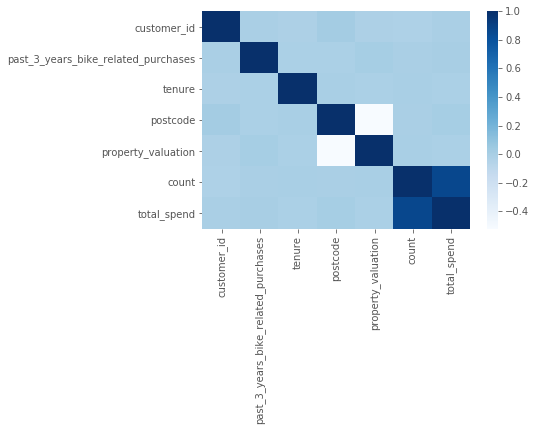

In [236]:
c_ht = customers.corr()
sns.heatmap(c_ht, cmap="Blues")

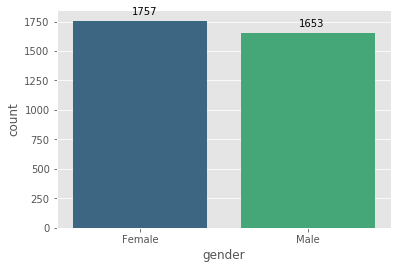

In [237]:
ax = sns.countplot(x='gender',data=customers,palette='viridis')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50))

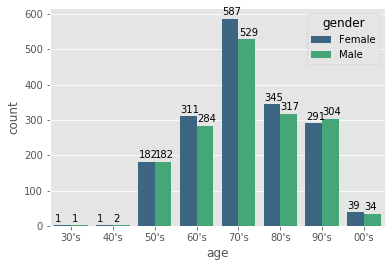

In [238]:
ax = sns.countplot(x='age',data=customers,hue="gender", palette='viridis')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10))

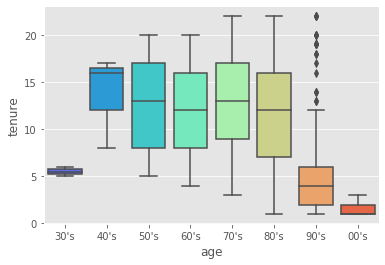

In [239]:
sns.boxplot(x='age',y='tenure',data=customers,palette='rainbow')

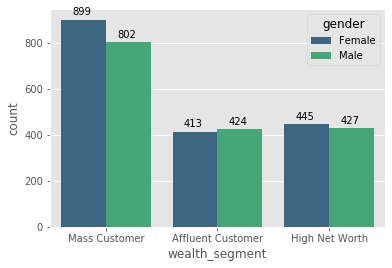

In [240]:
ax = sns.countplot(x='wealth_segment',data=customers,hue="gender", palette='viridis')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+20))

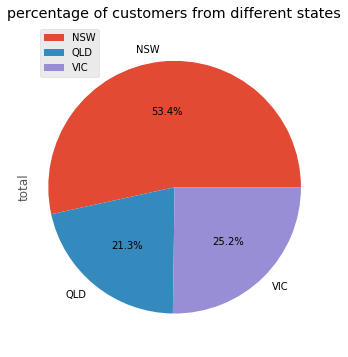

In [241]:
df_bar = pd.DataFrame(customers.groupby(['state']).count()['customer_id'])
df_bar = df_bar.rename(columns={'customer_id': 'total'})

df_bar['total'].plot(kind='pie',figsize=(5, 6),autopct='%1.1f%%')

plt.legend(labels=df_bar.index, loc='upper left') 
plt.title('percentage of customers from different states')
plt.axis('equal') 

plt.show()

Text(0, 0.5, 'number of people')

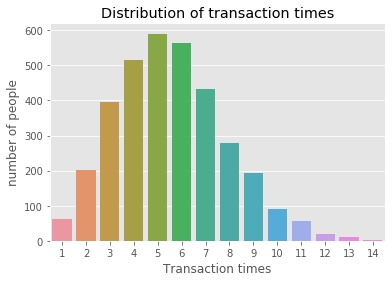

In [242]:
ax = sns.countplot(x='count',data=customers)

plt.title('Distribution of transaction times')
plt.xlabel('Transaction times')
plt.ylabel('number of people')

Text(0, 0.5, 'number of people')

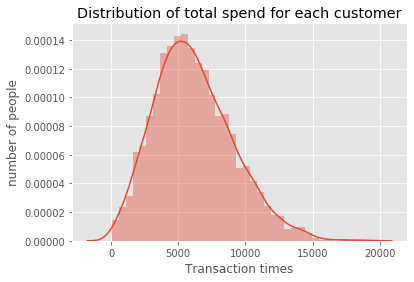

In [243]:
sns.distplot(customers['total_spend'])

plt.title('Distribution of total spend for each customer')
plt.xlabel('Transaction times')
plt.ylabel('number of people')

### label customers

In [244]:
def label(count, tspend):
    if count>=6 and tspend >=6000:
        return 1
    else:
        return 0

customers['label'] = customers.apply(lambda x: label(x['count'], x['total_spend']), axis=1)

In [245]:
customers.head()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,age,count,total_spend,label
0,1,Female,93,Mass Customer,Yes,11,060 Morning Avenue,2016.0,NSW,10.0,50's,11,9084.45,1
1,2,Male,81,Mass Customer,Yes,16,6 Meadow Vale Court,2153.0,NSW,10.0,80's,3,4149.07,0
2,4,Male,33,Mass Customer,No,7,0 Holy Cross Court,4211.0,QLD,9.0,60's,2,1047.72,0
3,5,Female,56,Affluent Customer,Yes,8,17979 Del Mar Point,2448.0,NSW,4.0,70's,6,5903.20,0
4,6,Male,35,High Net Worth,Yes,13,9 Oakridge Court,3216.0,VIC,9.0,60's,5,5931.69,0


In [246]:
customers['label'].value_counts()

0    2033
1    1377
Name: label, dtype: int64

## Visualization: transactions table

In [247]:
trans['margins'] = trans["list_price"] - trans["standard_cost"]

In [248]:
trans = trans.dropna()

In [249]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [250]:
trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,margins,month
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,0.500849,1107.337193,555.585260,551.751933,6.520082
std,5779.669087,30.571996,1011.889153,0.500012,582.662400,405.596541,493.211843,3.448443
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,4.800000,1.000000
25%,4976.000000,18.000000,857.000000,0.000000,575.270000,215.140000,133.780000,4.000000
50%,9985.000000,45.000000,1741.000000,1.000000,1163.890000,507.580000,445.210000,7.000000
75%,14997.000000,72.000000,2615.000000,1.000000,1635.300000,795.100000,830.240000,10.000000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000,1702.550000,12.000000


In [251]:
trans.corr()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,margins,month
transaction_id,1.000000,-0.011633,0.002779,0.001693,-0.006391,-0.002293,-0.005664,-0.000790
product_id,-0.011633,1.000000,0.003369,-0.005471,0.090085,0.038830,0.074491,0.007882
customer_id,0.002779,0.003369,1.000000,0.003215,0.011671,0.006870,0.008138,0.005724
online_order,0.001693,-0.005471,0.003215,1.000000,-0.000927,0.006934,-0.006798,0.001250
list_price,-0.006391,0.090085,0.011671,-0.000927,1.000000,0.551666,0.727696,-0.005765
standard_cost,-0.002293,0.038830,0.006870,0.006934,0.551666,1.000000,-0.170639,-0.013788
margins,-0.005664,0.074491,0.008138,-0.006798,0.727696,-0.170639,1.000000,0.004528
month,-0.000790,0.007882,0.005724,0.001250,-0.005765,-0.013788,0.004528,1.000000


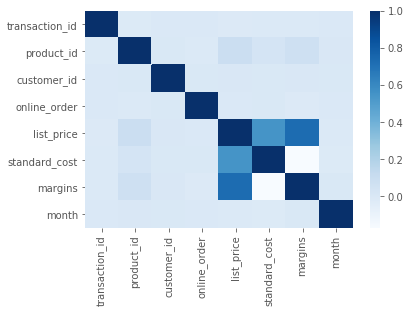

In [252]:
t_ht = trans.corr()
sns.heatmap(t_ht, cmap="Blues")

## slice transaction_date by months

In [253]:
trans['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [254]:
trans['transaction_date'].min()

Timestamp('2017-01-01 00:00:00')

In [255]:
trans["month"] = trans['transaction_date'].map(lambda x: x.month)

Text(0.5, 1.0, 'number of transactions by month')

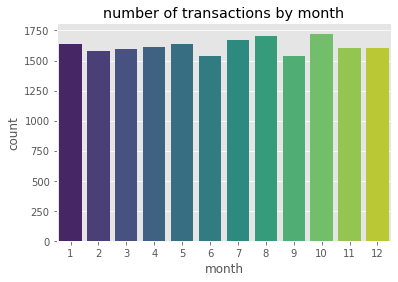

In [256]:
sns.countplot(x='month',data=trans, palette='viridis')
plt.title('number of transactions by month')

## Groupby data

In [257]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margins,month
0,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,1970-01-01 11:43:38,104.244984,10
1,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,1970-01-01 09:54:27,90.100012,1
2,17469,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,1970-01-01 09:24:39,75.139976,1
3,2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,1970-01-01 11:27:25,17.870000,4
4,6309,69,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.680000,1970-01-01 09:24:39,198.220000,1


In [258]:
df_forGroup = trans[['month', 'list_price']]
df_byMonth = df_forGroup.groupby(['month'],as_index=True).sum()
df_byMonth

,list_price
month,
1,1814943.49
2,1744536.31
3,1752618.98
4,1791861.52
5,1864538.66
6,1709785.22
7,1837843.44
8,1882049.62
9,1698320.44


In [259]:
df_forGroup1 = trans[['brand','product_line','product_class', 'transaction_id']]
df_byproduct = df_forGroup1.groupby(['brand','product_line','product_class'],as_index=False).count()

df_byproduct.rename(columns={'transaction_id': 'count'}, inplace=True)

df_top10 = df_byproduct.sort_values(by='count').tail(10).reset_index()
df_top10.drop(columns='index',axis =1, inplace=True)
df_top10 = df_top10.tail(10) 
df_top10

,brand,product_line,product_class,count
0,Trek Bicycles,Road,medium,606
1,WeareA2B,Touring,medium,611
2,Norco Bicycles,Road,medium,722
3,Giant Bicycles,Standard,high,767
4,Norco Bicycles,Standard,medium,966
5,OHM Cycles,Standard,medium,1066
6,Trek Bicycles,Standard,medium,1234
7,Giant Bicycles,Standard,medium,1731
8,WeareA2B,Standard,medium,2309
9,Solex,Standard,medium,2490


In [260]:
lst = []
for i in range(10):
    lst.append(df_top10['brand'][i] + ':' + df_top10['product_line'][i] + '(class:' + df_top10['product_class'][i] + ')')

In [261]:
df_top10['product'] = lst
df_top10.drop(['brand','product_line','product_class'], axis=1, inplace=True)
df_top10

,count,product
0,606,Trek Bicycles:Road(class:medium)
1,611,WeareA2B:Touring(class:medium)
2,722,Norco Bicycles:Road(class:medium)
3,767,Giant Bicycles:Standard(class:high)
4,966,Norco Bicycles:Standard(class:medium)
5,1066,OHM Cycles:Standard(class:medium)
6,1234,Trek Bicycles:Standard(class:medium)
7,1731,Giant Bicycles:Standard(class:medium)
8,2309,WeareA2B:Standard(class:medium)
9,2490,Solex:Standard(class:medium)


In [262]:
df_top10.set_index('product', inplace=True)

In [263]:
df_top10

,count
product,
Trek Bicycles:Road(class:medium),606
WeareA2B:Touring(class:medium),611
Norco Bicycles:Road(class:medium),722
Giant Bicycles:Standard(class:high),767
Norco Bicycles:Standard(class:medium),966
OHM Cycles:Standard(class:medium),1066
Trek Bicycles:Standard(class:medium),1234
Giant Bicycles:Standard(class:medium),1731
WeareA2B:Standard(class:medium),2309


Text(0.5, 1.0, 'Top 10 products sold')

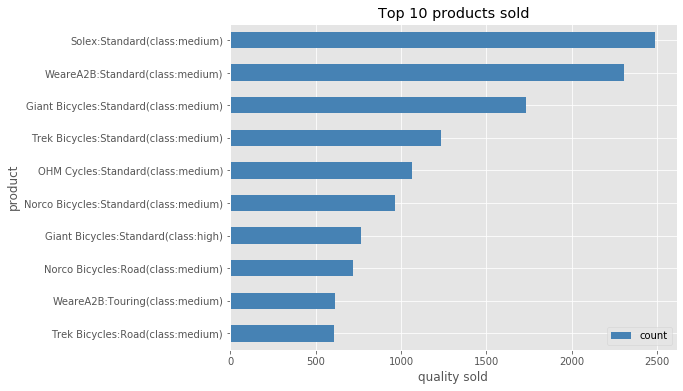

In [264]:
df_top10.plot(kind='barh', figsize=(8,6), color='steelblue')
plt.xlabel('quality sold')
plt.title('Top 10 products sold')

In [265]:
trans['list_price'].sum()

21532171.720000003

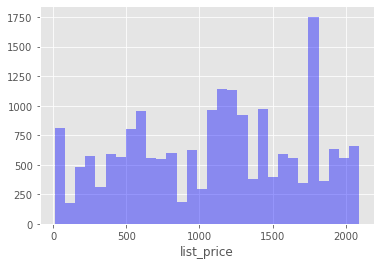

In [266]:
sns.distplot(trans['list_price'],kde=False, bins=30, color= 'blue')

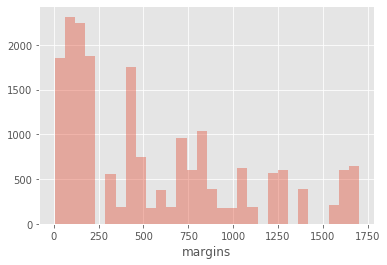

In [267]:
sns.distplot(trans['margins'], kde=False,bins=30)

# Module_03 Modeling

In [348]:
customers.head()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,age,count,total_spend,label
0,1,Female,93,Mass Customer,Yes,11,060 Morning Avenue,2016.0,NSW,10.0,50's,11,9084.45,1
1,2,Male,81,Mass Customer,Yes,16,6 Meadow Vale Court,2153.0,NSW,10.0,80's,3,4149.07,0
2,4,Male,33,Mass Customer,No,7,0 Holy Cross Court,4211.0,QLD,9.0,60's,2,1047.72,0
3,5,Female,56,Affluent Customer,Yes,8,17979 Del Mar Point,2448.0,NSW,4.0,70's,6,5903.20,0
4,6,Male,35,High Net Worth,Yes,13,9 Oakridge Court,3216.0,VIC,9.0,60's,5,5931.69,0


In [349]:
df = customers.drop(['customer_id','address', 'postcode', 'count', 'total_spend'], axis=1)
df.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,state,property_valuation,age,label
0,Female,93,Mass Customer,Yes,11,NSW,10.0,50's,1
1,Male,81,Mass Customer,Yes,16,NSW,10.0,80's,0
2,Male,33,Mass Customer,No,7,QLD,9.0,60's,0
3,Female,56,Affluent Customer,Yes,8,NSW,4.0,70's,0
4,Male,35,High Net Worth,Yes,13,VIC,9.0,60's,0


In [350]:
df.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'state', 'property_valuation', 'age', 'label'],
      dtype='object')

### get dummies

In [351]:
df = pd.get_dummies(df,columns=['gender'],drop_first=True)
df.rename(columns={'gender_Male': 'Male'}, inplace=True)

df = pd.get_dummies(df,columns=['wealth_segment'])
df = pd.get_dummies(df,columns=['age'])

df = pd.get_dummies(df,columns=['owns_car'],drop_first=True)
df.rename(columns={'owns_car_Yes': 'owns_car'}, inplace=True)

df = pd.get_dummies(df,columns=['state'])

In [352]:
df.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,label,Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,age_30's,age_40's,age_50's,age_60's,age_70's,age_80's,age_90's,age_00's,owns_car,state_NSW,state_QLD,state_VIC
0,93,11,10.0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
1,81,16,10.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
2,33,7,9.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,56,8,4.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,35,13,9.0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1


In [353]:
df.columns

Index(['past_3_years_bike_related_purchases', 'tenure', 'property_valuation',
       'label', 'Male', 'wealth_segment_Affluent Customer',
       'wealth_segment_High Net Worth', 'wealth_segment_Mass Customer',
       'age_30's', 'age_40's', 'age_50's', 'age_60's', 'age_70's', 'age_80's',
       'age_90's', 'age_00's', 'owns_car', 'state_NSW', 'state_QLD',
       'state_VIC'],
      dtype='object')

In [354]:
df = df[['past_3_years_bike_related_purchases', 'tenure', 'property_valuation',
       'Male', 'wealth_segment_Affluent Customer',
       'wealth_segment_High Net Worth', 'wealth_segment_Mass Customer',
       'age_30\'s', 'age_40\'s', 'age_50\'s', 'age_60\'s', 'age_70\'s', 'age_80\'s',
       'age_90\'s', 'age_00\'s', 'owns_car', 'state_NSW', 'state_QLD',
       'state_VIC','label']]

In [355]:
df.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,age_30's,age_40's,age_50's,age_60's,age_70's,age_80's,age_90's,age_00's,owns_car,state_NSW,state_QLD,state_VIC,label
0,93,11,10.0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1
1,81,16,10.0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0
2,33,7,9.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,56,8,4.0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,35,13,9.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0


### Standardize the Variables

In [356]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('label',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [357]:
scaled_features = scaler.transform(df.drop('label',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,age_30's,age_40's,age_50's,age_60's,age_70's,age_80's,age_90's,age_00's,owns_car,state_NSW,state_QLD,state_VIC
0,1.536663,0.056297,0.880184,-0.969953,-0.570352,-0.586155,1.002349,-0.024225,-0.029674,2.892772,-0.459747,-0.697486,-0.490818,-0.459747,-0.147905,0.990079,0.933579,-0.520998,-0.580737
1,1.117863,0.937707,0.880184,1.030978,-0.570352,-0.586155,1.002349,-0.024225,-0.029674,-0.345689,-0.459747,-0.697486,2.037414,-0.459747,-0.147905,0.990079,0.933579,-0.520998,-0.580737
2,-0.557335,-0.648832,0.525782,1.030978,-0.570352,-0.586155,1.002349,-0.024225,-0.029674,-0.345689,2.175107,-0.697486,-0.490818,-0.459747,-0.147905,-1.010021,-1.071147,1.919392,-0.580737
3,0.245364,-0.472550,-1.246226,-0.969953,1.753304,-0.586155,-0.997657,-0.024225,-0.029674,-0.345689,-0.459747,1.433721,-0.490818,-0.459747,-0.147905,0.990079,0.933579,-0.520998,-0.580737
4,-0.487535,0.408861,0.525782,1.030978,-0.570352,1.706034,-0.997657,-0.024225,-0.029674,-0.345689,2.175107,-0.697486,-0.490818,-0.459747,-0.147905,0.990079,-1.071147,-0.520998,1.721951


### Train Test Split

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['label'],
                                                    test_size=0.30)

### Using KNN

In [360]:
from sklearn.neighbors import KNeighborsClassifier

In [361]:
knn = KNeighborsClassifier(n_neighbors=1)

In [362]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Predictions and Evaluations

In [363]:
pred = knn.predict(X_test)

In [364]:
from sklearn.metrics import classification_report,confusion_matrix

In [365]:
print(confusion_matrix(y_test,pred))

[[369 246]
 [245 163]]


In [366]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       615
           1       0.40      0.40      0.40       408

    accuracy                           0.52      1023
   macro avg       0.50      0.50      0.50      1023
weighted avg       0.52      0.52      0.52      1023



### Choosing a K Value

In [367]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

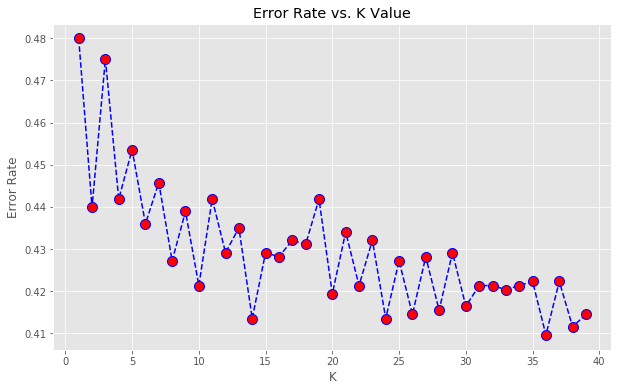

In [368]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [369]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=6


[[499 116]
 [330  78]]


              precision    recall  f1-score   support

           0       0.60      0.81      0.69       615
           1       0.40      0.19      0.26       408

    accuracy                           0.56      1023
   macro avg       0.50      0.50      0.48      1023
weighted avg       0.52      0.56      0.52      1023



## Predict valuable customers

In [383]:
ncList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [384]:
ncList['DOB'].describe()

count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

In [385]:
ncList['age'] = pd.cut(x=ncList['DOB'],bins=[bin01, bin02, bin03, bin04, bin05, bin06, bin07, bin08, bin09], 
                       labels=["30's", "40's", "50's","60's", "70's", "80's","90's", "00's"])

ncList.drop('DOB', axis=1, inplace=True)

In [386]:
ncList['gender'].value_counts()

Female         513
Male           470
Unspecified     17
Name: gender, dtype: int64

In [387]:
ncList = ncList[ncList['gender'] != 'Unspecified']

In [388]:
ncList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,50's
1,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,70's
2,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,70's
3,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,70's
4,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,60's


In [389]:
ncList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age'],
      dtype='object')

In [390]:
ncList_feat = ncList.drop(['first_name', 'last_name', 'job_title',
       'job_industry_category','deceased_indicator','address', 'postcode', 'country', 'Rank', 'Value'], axis=1)
ncList_feat.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,state,property_valuation,age
0,Male,86,Mass Customer,Yes,14,QLD,6,50's
1,Male,69,Mass Customer,No,16,NSW,11,70's
2,Female,10,Affluent Customer,No,10,VIC,5,70's
3,Female,64,Affluent Customer,Yes,5,QLD,1,70's
4,Female,34,Affluent Customer,No,19,NSW,9,60's


In [391]:
ncList_feat = pd.get_dummies(ncList_feat,columns=['gender'],drop_first=True)
ncList_feat.rename(columns={'gender_Male': 'Male'}, inplace=True)

ncList_feat = pd.get_dummies(ncList_feat,columns=['wealth_segment'])
ncList_feat = pd.get_dummies(ncList_feat,columns=['age'])

ncList_feat = pd.get_dummies(ncList_feat,columns=['owns_car'],drop_first=True)
ncList_feat.rename(columns={'owns_car_Yes': 'owns_car'}, inplace=True)

ncList_feat = pd.get_dummies(ncList_feat,columns=['state'])

In [392]:
from sklearn.preprocessing import StandardScaler

In [393]:
scalerNew = StandardScaler()

In [394]:
scalerNew.fit(ncList_feat)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [395]:
scaledNew_featured = scalerNew.transform(ncList_feat)

In [396]:
newcustomers_feat = pd.DataFrame(scaledNew_featured,columns=ncList_feat.columns)
newcustomers_feat.head()

,past_3_years_bike_related_purchases,tenure,property_valuation,Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,age_30's,age_40's,age_50's,age_60's,age_70's,age_80's,age_90's,age_00's,owns_car,state_NSW,state_QLD,state_VIC
0,1.302608,0.507674,-0.510328,1.044744,-0.56051,-0.582441,0.984855,-0.158196,-0.309637,2.156253,-0.468618,-0.536969,-0.351324,-0.458902,-0.154785,1.011254,-1.015378,1.830180,-0.596542
1,0.690480,0.907388,1.303310,1.044744,-0.56051,-0.582441,0.984855,-0.158196,-0.309637,-0.463768,-0.468618,1.862306,-0.351324,-0.458902,-0.154785,-0.988872,0.984855,-0.546394,-0.596542
2,-1.433964,-0.291755,-0.873055,-0.957173,1.78409,-0.582441,-1.015378,-0.158196,-0.309637,-0.463768,-0.468618,1.862306,-0.351324,-0.458902,-0.154785,-0.988872,-1.015378,-0.546394,1.676329
3,0.510442,-1.291040,-2.323966,-0.957173,1.78409,-0.582441,-1.015378,-0.158196,-0.309637,-0.463768,-0.468618,1.862306,-0.351324,-0.458902,-0.154785,1.011254,-1.015378,1.830180,-0.596542
4,-0.569783,1.506959,0.577855,-0.957173,1.78409,-0.582441,-1.015378,-0.158196,-0.309637,-0.463768,2.133934,-0.536969,-0.351324,-0.458902,-0.154785,-0.988872,0.984855,-0.546394,-0.596542


In [397]:
scaledNew_featured

array([[ 1.30260803,  0.50767355, -0.51032786, ..., -1.01537763,
         1.83017964, -0.59654176],
       [ 0.69048006,  0.90738769,  1.30331021, ...,  0.98485526,
        -0.54639445, -0.59654176],
       [-1.43396407, -0.29175473, -0.87305548, ..., -1.01537763,
        -0.54639445,  1.67632858],
       ...,
       [-1.18191138,  0.70753062, -1.96123832, ..., -1.01537763,
         1.83017964, -0.59654176],
       [-0.71381352,  1.5069589 , -1.96123832, ..., -1.01537763,
         1.83017964, -0.59654176],
       [ 0.2223822 ,  0.50767355,  0.57785498, ...,  0.98485526,
        -0.54639445, -0.59654176]])

### Predict labels

In [398]:
pred_newCustomer = knn.predict(scaledNew_featured)

In [399]:
pred_newCustomer

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [400]:
pred_label_newCustomer = pd.DataFrame(pred_newCustomer)

In [401]:
ncList = pd.concat([ncList, pred_label_newCustomer], axis=1)
ncList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,0
0,Chickie,Brister,Male,86.0,General Manager,Manufacturing,Mass Customer,N,Yes,14.0,45 Shopko Center,4500.0,QLD,Australia,6.0,1.0,1.718750,50's,1.0
1,Morly,Genery,Male,69.0,Structural Engineer,Property,Mass Customer,N,No,16.0,14 Mccormick Park,2113.0,NSW,Australia,11.0,1.0,1.718750,70's,0.0
2,Ardelis,Forrester,Female,10.0,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10.0,5 Colorado Crossing,3505.0,VIC,Australia,5.0,1.0,1.718750,70's,0.0
3,Lucine,Stutt,Female,64.0,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5.0,207 Annamark Plaza,4814.0,QLD,Australia,1.0,4.0,1.703125,70's,0.0
4,Melinda,Hadlee,Female,34.0,Financial Analyst,Financial Services,Affluent Customer,N,No,19.0,115 Montana Place,2093.0,NSW,Australia,9.0,4.0,1.703125,60's,0.0


In [405]:
ncList.rename(columns={0:'label'},inplace=True)

In [406]:
valuable_customers = ncList[ncList['label'] == 1][['first_name','last_name','job_title','address']]

In [407]:
valuable_customers

,first_name,last_name,job_title,address
0,Chickie,Brister,General Manager,45 Shopko Center
5,Druci,Brandli,Assistant Media Planner,89105 Pearson Terrace
22,Otis,Ottey,Quality Engineer,1562 Merchant Street
32,Sybilla,MacCart,Paralegal,74 Welch Pass
36,Farlie,Petford,Recruiting Manager,2330 Butternut Trail
...,...,...,...,...
961,Benedikt,Adamou,Recruiting Manager,4 Bluestem Pass
972,Ellwood,Budden,NaN,79907 Randy Center
973,Alex,Patshull,Senior Quality Engineer,446 High Crossing Way
977,Beverly,Domnick,Structural Analysis Engineer,8 Burning Wood Junction
